<a href="https://colab.research.google.com/github/Adrianus-Bagas/Passengers_Satisfaction/blob/main/Passengers_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Kepuasan Penumpang Pesawat Menggunakan LSTM

# 1. Import beberapa libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# 3. Preprocessing

In [5]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [7]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

In [8]:
df_train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
df_test.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df_train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [13]:
df_train['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [14]:
df_train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [15]:
for col in ['Gender', 'Customer Type', 'Type of Travel','satisfaction']:
    if df_train[col].dtype == 'O':
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
    if df_test[col].dtype == 'O':
        le = LabelEncoder()
        df_test[col] = le.fit_transform(df_test[col])
df_train = pd.get_dummies(df_train, columns=['Class'], prefix = 'Class')
df_test = pd.get_dummies(df_test, columns=['Class'], prefix = 'Class')

In [16]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,70172,1,0,13,1,460,3,4,3,...,4,4,5,5,25,18.0,0,0,0,1
1,1,5047,1,1,25,0,235,3,2,3,...,3,1,4,1,1,6.0,0,1,0,0
2,2,110028,0,0,26,0,1142,2,2,2,...,4,4,4,5,0,0.0,1,1,0,0
3,3,24026,0,0,25,0,562,2,5,5,...,3,1,4,2,11,9.0,0,1,0,0
4,4,119299,1,0,61,0,214,3,3,3,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,192,2,1,2,...,4,2,3,2,3,0.0,0,0,1,0
103900,103900,73097,1,0,49,0,2347,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,103901,68825,1,1,30,0,1995,1,1,1,...,4,5,5,4,7,14.0,0,1,0,0
103902,103902,54173,0,1,22,0,1000,1,1,1,...,1,5,4,1,0,0.0,0,0,1,0


In [17]:
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,19556,0,0,52,0,160,5,4,3,...,5,2,5,5,50,44.0,1,0,1,0
1,1,90035,0,0,36,0,2863,1,1,3,...,4,3,4,5,0,0.0,1,1,0,0
2,2,12360,1,1,20,0,192,2,0,2,...,3,2,2,2,0,0.0,0,0,1,0
3,3,77959,1,0,44,0,3377,0,0,0,...,1,3,1,4,0,6.0,1,1,0,0
4,4,36875,0,0,49,0,1182,2,3,4,...,2,4,2,4,0,20.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,1,34,0,526,3,3,3,...,4,4,5,4,0,0.0,0,1,0,0
25972,25972,71167,1,0,23,0,646,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
25973,25973,37675,0,0,17,1,828,2,5,1,...,4,5,4,2,0,0.0,0,0,1,0
25974,25974,90086,1,0,14,0,1127,3,3,3,...,5,4,5,4,0,0.0,1,1,0,0


In [18]:
df_train = df_train.drop(['Gender','id'],axis=1)
df_test = df_test.drop(['Gender','id'],axis=1)

# 4. Model LSTM

In [19]:
X_cont_train = df_train.drop(['Customer Type', 'Type of Travel','satisfaction'],axis=1).values
X_cont_test = df_test.drop(['Customer Type', 'Type of Travel','satisfaction'],axis=1).values

In [20]:
scaler = StandardScaler()
X_cont_train = scaler.fit_transform(X_cont_train)
X_cont_test = scaler.fit_transform(X_cont_test)

In [21]:
X_train = pd.DataFrame(X_cont_train)
X_test = pd.DataFrame(X_cont_test)

In [22]:
X_train['Customer Type'] = df_train['Customer Type']
X_test['Customer Type'] = df_test['Customer Type']
X_train['Type of Travel'] = df_train['Type of Travel']
X_test['Type of Travel'] = df_test['Type of Travel']

In [23]:
Y_train = df_train['satisfaction']
Y_test = df_test['satisfaction']

In [24]:
X_train = np.array(X_train).reshape(103904,24,1)
X_test = np.array(X_test).reshape(25976,24,1)

In [25]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'relu', return_sequences = True, input_shape = (24, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 24, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 24, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 24, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 24, 100)           8

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),batch_size = 128)

Epoch 1/10
812/812 [==============================] - 294s 343ms/step - loss: 0.4151 - accuracy: 0.8163 - val_loss: 0.3247 - val_accuracy: 0.8620
Epoch 2/10
812/812 [==============================] - 273s 336ms/step - loss: 0.2807 - accuracy: 0.8825 - val_loss: 0.2593 - val_accuracy: 0.8916
Epoch 3/10
812/812 [==============================] - 274s 338ms/step - loss: 0.2367 - accuracy: 0.9003 - val_loss: 0.2173 - val_accuracy: 0.9107
Epoch 4/10
812/812 [==============================] - 272s 335ms/step - loss: 0.2120 - accuracy: 0.9109 - val_loss: 0.2056 - val_accuracy: 0.9095
Epoch 5/10
812/812 [==============================] - 271s 334ms/step - loss: 0.1893 - accuracy: 0.9189 - val_loss: 0.1700 - val_accuracy: 0.9249
Epoch 6/10
812/812 [==============================] - 270s 333ms/step - loss: 0.1647 - accuracy: 0.9307 - val_loss: 0.1356 - val_accuracy: 0.9438
Epoch 7/10
812/812 [==============================] - 262s 323ms/step - loss: 0.1401 - accuracy: 0.9418 - val_loss: 0.1262 -

In [28]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)

Accuracy : 0.94876039421004
Precision : 0.9773459715639811
Recall : 0.9042357274401474
F1 Score : 0.9393704732838336


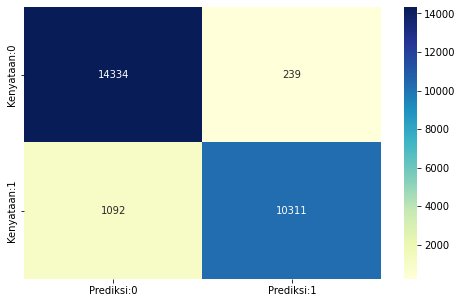

In [29]:
cm=confusion_matrix(Y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Prediksi:0','Prediksi:1'],index=['Kenyataan:0','Kenyataan:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

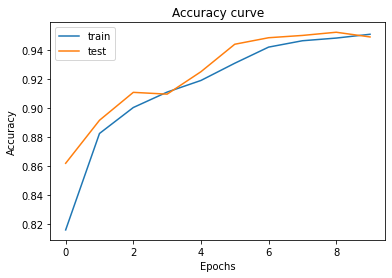

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend(['train','test'])
plt.show()

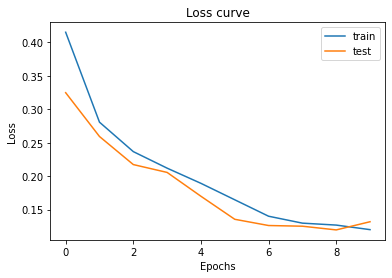

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.legend(['train','test'])
plt.show()